# **Análisis Exploratorio de Ofertas Relámpago en Mercado Libre**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Patrones de Venta y Factores Críticos

In [4]:
df_ofertas_relampago = pd.read_csv('/home/paulina/Documents/MercadoLibre/arquivos/ofertas_relampago.csv', encoding='latin1')
df_ofertas_relampago
df_ofertas_relampago.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


En el resumen de ofertas relampagos en la columna *INVOLVED_STOCK* su valor maximo de stock involucrado es de 9000, su minimo de 1 unidades y su media de 35 unidades. Lo que sugiere que la mayoría de las ofertas implican un stock relativamente pequeño.

La cantidad vendida también varía considerablemente, *SOLD_QUANTITY* con un máximo de 1646 unidades en una oferta y una media de 10.85 unidades. Esto indica que algunas ofertas son mucho más exitosas que otras.

In [5]:
len(df_ofertas_relampago['DOMAIN_ID'].unique())

1266

In [5]:
# Verificar valores nulos
df_full_devices.isnull().sum()
df_items_titles_test.isnull().sum()
df_ofertas_relampago.isnull().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

Realizando un analisis sobre valores nulos, podemos notar que *SOLD_AMOUNT* y *SOLD_QUANTITY* tienen ambos valores nulos de 24167, lo que indica  que hubieron ofertas donde no se registraron ventas.

La columna *ORIGIN* tiene una gran cantidad de valores nulos 37430, lo que sugiere que la procedencia del producto no siempre está registrada.

In [6]:
print(df_ofertas_relampago['OFFER_START_DATE'].min())
print(df_ofertas_relampago['OFFER_START_DATE'].max())

2021-06-01
2021-07-31


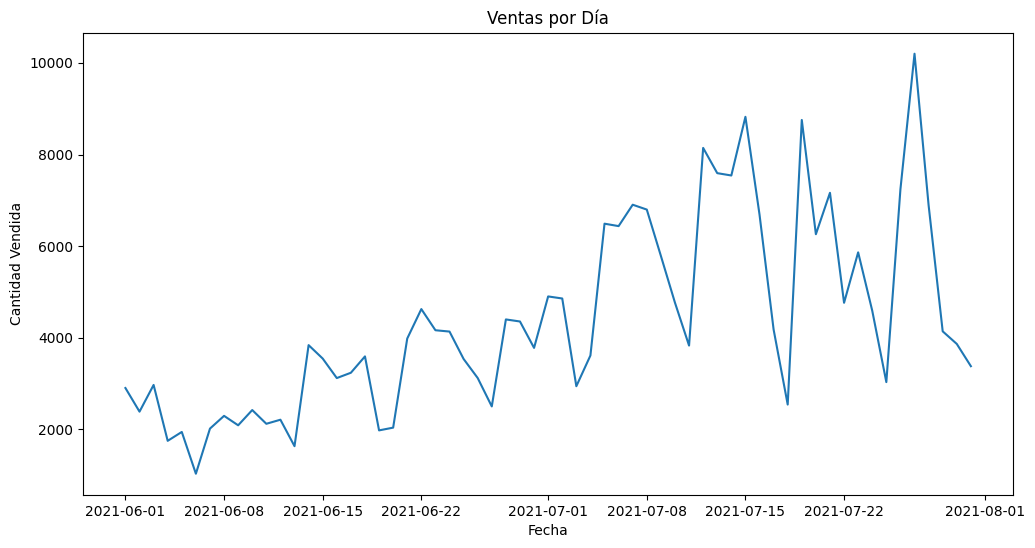

In [7]:
# Convertir las columnas de fecha a datetime
df_ofertas_relampago['OFFER_START_DATE'] = pd.to_datetime(df_ofertas_relampago['OFFER_START_DATE'])
df_ofertas_relampago['OFFER_START_DTTM'] = pd.to_datetime(df_ofertas_relampago['OFFER_START_DTTM'])
df_ofertas_relampago['OFFER_FINISH_DTTM'] = pd.to_datetime(df_ofertas_relampago['OFFER_FINISH_DTTM'])

# Agrupar y graficar las ventas por fecha
sales_per_day = df_ofertas_relampago.groupby(df_ofertas_relampago['OFFER_START_DATE'].dt.date)['SOLD_QUANTITY'].sum()

plt.figure(figsize=(12, 6))
sales_per_day.plot()
plt.title('Ventas por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.show()

Este grafico nos permite observar las ventas diarias y como se comportaron a lo largo del tiempo. Lo que notamos es que, aunque hay días con ventas más bajas, en general, las ventas tienden a aumentar hacia mediados de julio. Hay algunos picos notables en los que las ventas se disparan, lo que podría estar relacionado con ofertas especiales o productos muy demandados. Estos picos son interesantes porque pueden indicar qué tipo de promociones o productos tuvieron más éxito, y nos podrían dar pistas para mejorar futuras campañas de ventas.

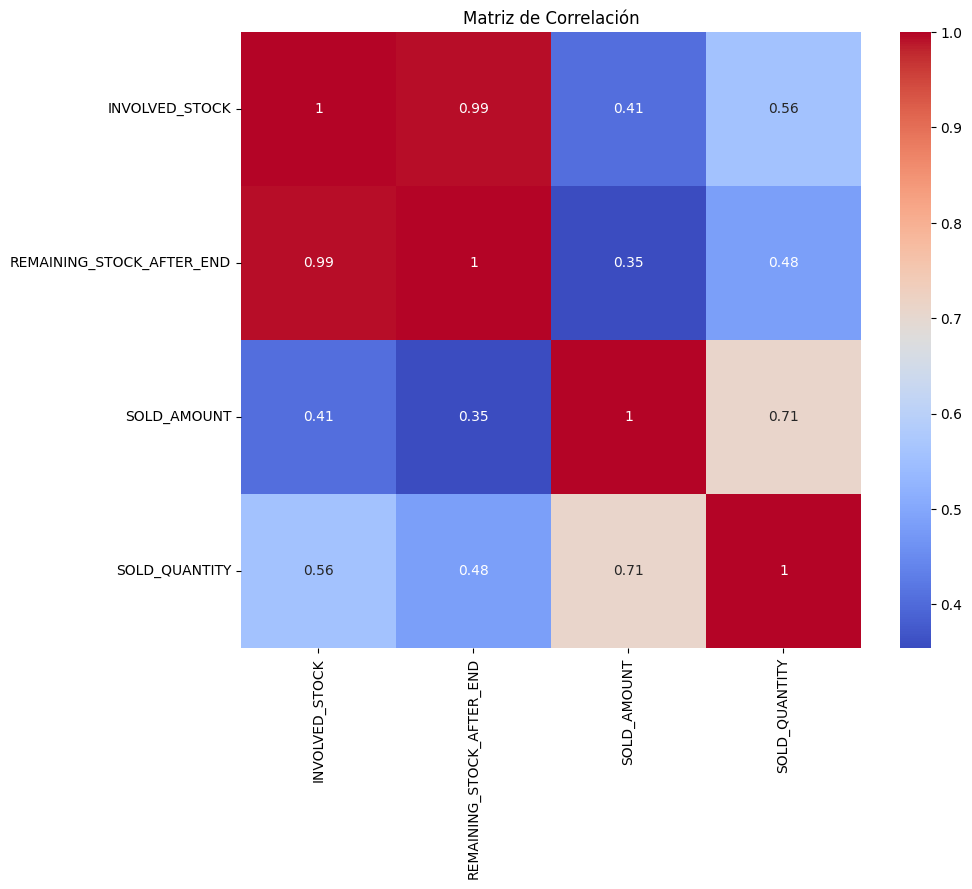

In [8]:
# Matriz de correlación
numeric_columns = df_ofertas_relampago.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

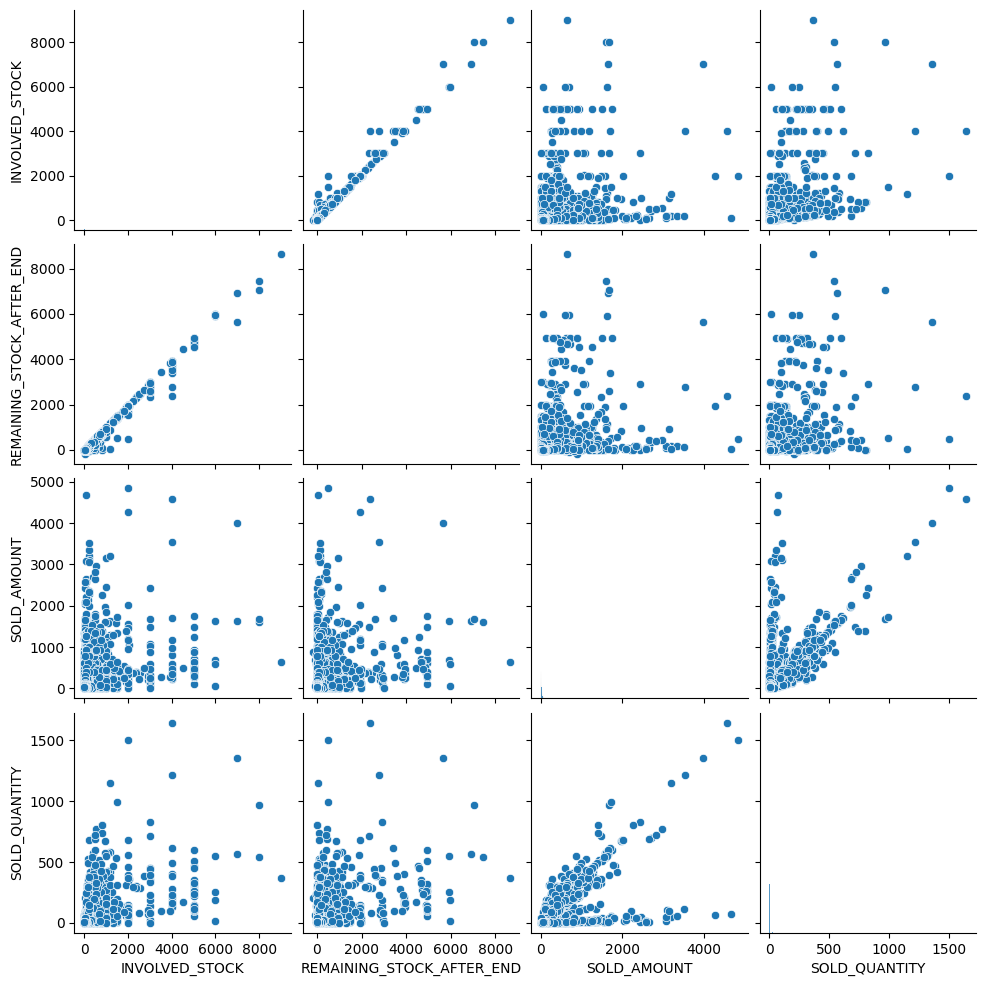

In [34]:
sns.pairplot(numeric_columns)

Para comprender cómo se relacionan entre sí las diferentes variables numéricas del dataset de ofertas relámpago, diseñamos una Matriz de Correlación. Donde podemos observar que:

*   **Stock Involucrado y Stock Restante:** *INVOLVED_STOCK y REMAINING_STOCK_AFTER_END (0.99)* Vemos que hay una correlación casi perfecta entre el stock que se incluye en una oferta y lo que queda después de que la oferta termina. Esto sugiere que, en muchos casos, gran parte del stock no se vende, lo que podría significar que la demanda no siempre coincide con la oferta.
*   **Cantidad Vendida y Monto Total Vendido:** *SOLD_AMOUNT y SOLD_QUANTITY (0.71)* Un comportamiento usual donde hay una fuerte relación entre cuántos productos se venden y el total de dinero recaudado. Esto es lógico: cuando más unidades se venden, más ingresos se generan.
*   **Stock Involucrado y Cantidad Vendida:** *INVOLVED_STOCK y SOLD_QUANTITY (0.56)* También notamos una correlación moderada entre la cantidad de stock disponible y cuántos productos se venden. Esto nos dice que, aunque tener más stock puede ayudar a vender más, no es el único factor que importa. Quizás hay otros elementos, como el tipo de producto o el precio, que también juegan un papel crucial.


## Análisis de los Picos en Ventas

In [9]:
# Días con las ventas más altas
top_sales_days = sales_per_day.nlargest(5)
top_sales_days

OFFER_START_DATE
2021-07-27    10200.0
2021-07-15     8823.0
2021-07-19     8754.0
2021-07-12     8144.0
2021-07-13     7593.0
Name: SOLD_QUANTITY, dtype: float64

In [10]:
df_ofertas_relampago['OFFER_START_DATE'] = pd.to_datetime(df_ofertas_relampago['OFFER_START_DATE'])

In [11]:
# Ofertas en los días con mayores venta
# Filtrar las ofertas activas en los días con mayores ventas
offers_on_top_days = df_ofertas_relampago[df_ofertas_relampago['OFFER_START_DATE'].dt.date.isin(top_sales_days.index)]

# Resumen estadístico de las ofertas en los días con picos
offers_on_top_days.describe()

,OFFER_START_DATE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,4437,4437.000000,4437.000000,2401.000000,2401.000000
mean,2021-07-17 20:42:21.176470528,45.867929,38.457516,72.109117,18.123282
min,2021-07-12 00:00:00,1.000000,-192.000000,0.420000,1.000000
25%,2021-07-13 00:00:00,5.000000,4.000000,6.080000,1.000000
50%,2021-07-15 00:00:00,15.000000,8.000000,13.660000,3.000000
75%,2021-07-27 00:00:00,15.000000,15.000000,37.710000,7.000000
max,2021-07-27 00:00:00,8000.000000,7035.000000,4836.570000,1646.000000
std,NaN,275.487231,247.054362,271.806210,85.979076


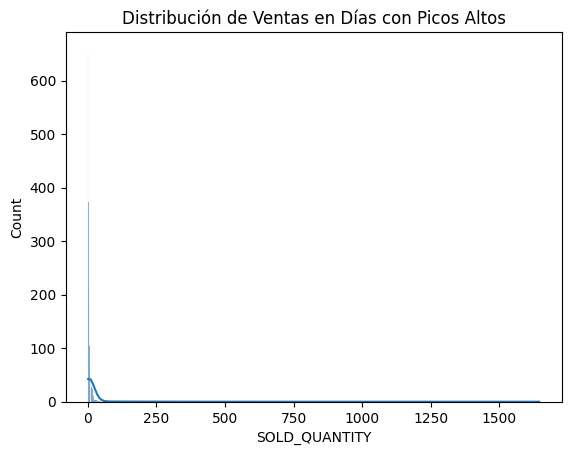

In [12]:
# Análisis de la distribución de las ventas en esos días
sns.histplot(offers_on_top_days['SOLD_QUANTITY'].dropna(), kde=True)
plt.title('Distribución de Ventas en Días con Picos Altos')
plt.show()

La distribución de ventas en días  con picos altos esta bastante sesgada a la izquierda, mostrando que la mayoria de las ofertas tuvieron una cantidad vendida relativamente baja, con pocos eventos alcanzando cifras más altas, es decir, son pocas  las ofertas que impulsan los picos de oferta relampago.

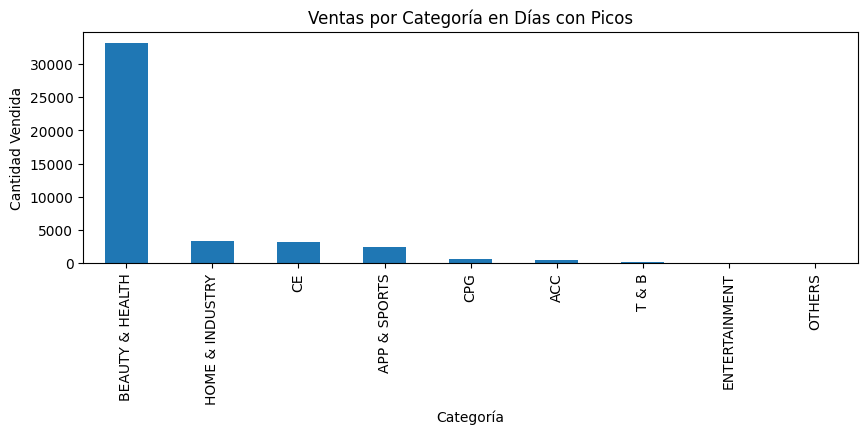

In [13]:
# Análisis por Categoría de Producto

sales_by_vertical = offers_on_top_days.groupby('VERTICAL')['SOLD_QUANTITY'].sum().sort_values(ascending=False)
sales_by_vertical.plot(kind='bar', figsize=(10, 3))
plt.title('Ventas por Categoría en Días con Picos')
plt.xlabel('Categoría')
plt.ylabel('Cantidad Vendida')
plt.show()

Es notorio la gran diferencia, pues la categoria *Beauty & Health* es la más vendida durante los picos, siendo la más popular, seria interesante para futuras estrategias, ya que el área de belleza y salud actualmente supera a creces las otras categorias.

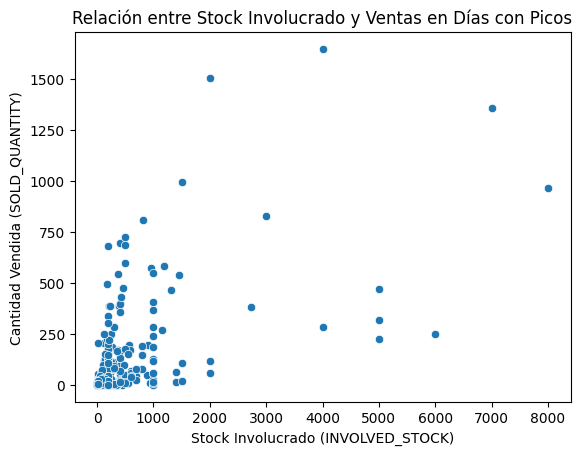

In [14]:
# Análisis de la Relación entre Stock y Ventas
# INVOLVED_STOCK vs SOLD_QUANTITY en días con picos
sns.scatterplot(data=offers_on_top_days, x='INVOLVED_STOCK', y='SOLD_QUANTITY')
plt.title('Relación entre Stock Involucrado y Ventas en Días con Picos')
plt.xlabel('Stock Involucrado (INVOLVED_STOCK)')
plt.ylabel('Cantidad Vendida (SOLD_QUANTITY)')
plt.show()

No se observa una relación lineal clara entre el stock involucrado y la cantidad vendida. Algunas ofertas con poco stock logran ventas altas, mientras que otras con mucho stock no lo hacen. Esto sugiere que el éxito de las ventas no depende únicamente de la cantidad de stock, sino de otros factores como la popularidad del producto, el precio, etc.

In [15]:
# Análisis de las Ofertas con Stock Insuficiente

# Donde REMAINING_STOCK_AFTER_END es negativo
stock_out_offers = offers_on_top_days[offers_on_top_days['REMAINING_STOCK_AFTER_END'] < 0]

# Resumen de estas ofertas
stock_out_offers.describe()

,OFFER_START_DATE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,155,155.000000,155.000000,150.000000,150.000000
mean,2021-07-17 21:59:13.548387072,25.496774,-4.567742,75.793133,30.060000
min,2021-07-12 00:00:00,5.000000,-192.000000,2.850000,1.000000
25%,2021-07-13 00:00:00,5.000000,-3.000000,11.887500,7.000000
50%,2021-07-15 00:00:00,15.000000,-2.000000,25.870000,13.000000
75%,2021-07-23 00:00:00,15.000000,-1.000000,43.065000,17.000000
max,2021-07-27 00:00:00,810.000000,-1.000000,2255.460000,808.000000
std,NaN,84.635765,16.896176,240.286981,87.723041


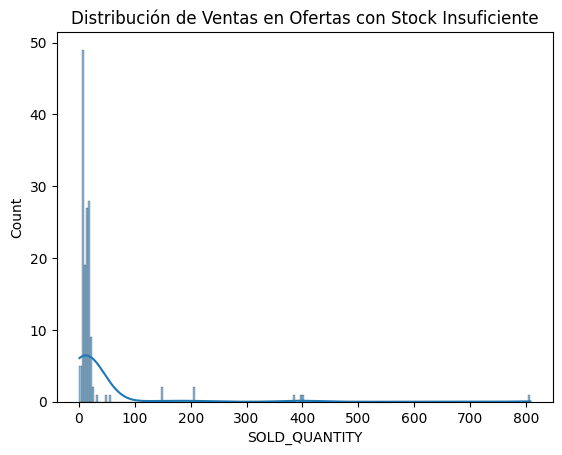

In [16]:
# Distribución de las ventas en estas ofertas
sns.histplot(stock_out_offers['SOLD_QUANTITY'].dropna(), kde=True)
plt.title('Distribución de Ventas en Ofertas con Stock Insuficiente')
plt.show()

La mayoría de las ofertas con stock insuficiente también tienen ventas relativamente bajas, aunque algunas ofertas muestran un número considerable de ventas. Esto podría indicar que, aunque hubo demanda, no se pudo satisfacer completamente debido a limitaciones de stock.

### Análisis de Tiempo y Duración de las Ofertas

/tmp/ipykernel_157510/3602793306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_on_top_days['OFFER_START_DTTM'] = pd.to_datetime(offers_on_top_days['OFFER_START_DTTM'])
/tmp/ipykernel_157510/3602793306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_on_top_days['OFFER_START_HOUR'] = offers_on_top_days['OFFER_START_DTTM'].dt.hour


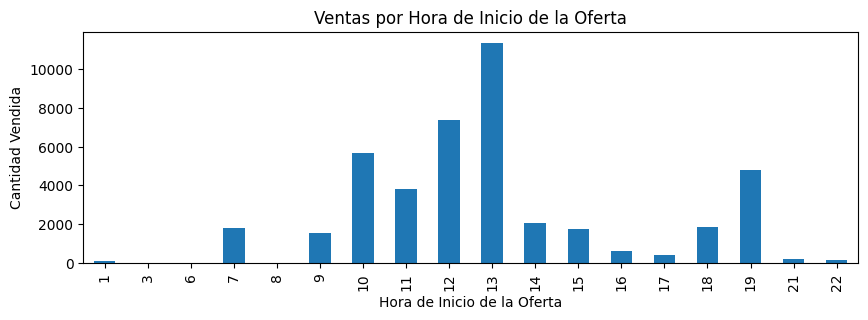

In [17]:
# Análisis de Ventas por Hora del Día

# Extraer la hora de inicio de la oferta
offers_on_top_days['OFFER_START_DTTM'] = pd.to_datetime(offers_on_top_days['OFFER_START_DTTM'])
offers_on_top_days['OFFER_START_HOUR'] = offers_on_top_days['OFFER_START_DTTM'].dt.hour

# Agrupar por hora de inicio y sumar las ventas
sales_by_hour = offers_on_top_days.groupby('OFFER_START_HOUR')['SOLD_QUANTITY'].sum()

sales_by_hour.plot(kind='bar', figsize=(10, 3))
plt.title('Ventas por Hora de Inicio de la Oferta')
plt.xlabel('Hora de Inicio de la Oferta')
plt.ylabel('Cantidad Vendida')
plt.show()

La mayor parte de las ventas ocurren alrededor del mediodía, especialmente entre las 12 y 13 horas. Esto podría deberse a que más usuarios están activos en estas horas, lo que sugiere que programar ofertas en este rango horario podría maximizar las ventas.

/tmp/ipykernel_157510/1022996032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_on_top_days['OFFER_FINISH_DTTM'] = pd.to_datetime(offers_on_top_days['OFFER_FINISH_DTTM'])
/tmp/ipykernel_157510/1022996032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_on_top_days['OFFER_DURATION_HOURS'] = (offers_on_top_days['OFFER_FINISH_DTTM'] - offers_on_top_days['OFFER_START_DTTM']).dt.total_seconds() / 3600


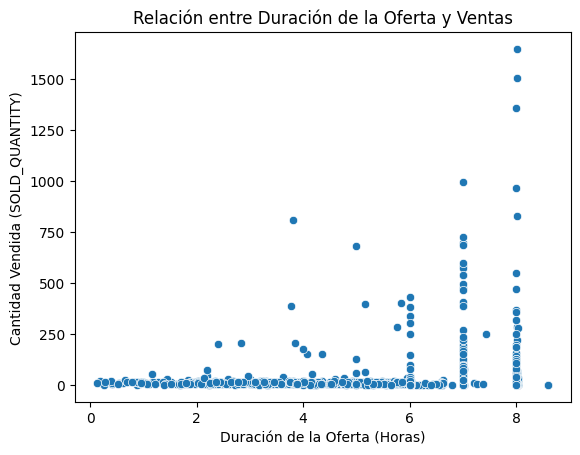

In [18]:
# Análisis de Duración de la Oferta y Ventas

# Duración de la oferta en horas
offers_on_top_days['OFFER_FINISH_DTTM'] = pd.to_datetime(offers_on_top_days['OFFER_FINISH_DTTM'])
offers_on_top_days['OFFER_DURATION_HOURS'] = (offers_on_top_days['OFFER_FINISH_DTTM'] - offers_on_top_days['OFFER_START_DTTM']).dt.total_seconds() / 3600

sns.scatterplot(data=offers_on_top_days, x='OFFER_DURATION_HOURS', y='SOLD_QUANTITY')
plt.title('Relación entre Duración de la Oferta y Ventas')
plt.xlabel('Duración de la Oferta (Horas)')
plt.ylabel('Cantidad Vendida (SOLD_QUANTITY)')
plt.show()

Las ofertas que duran entre 5 y 8 horas parecen tener mejor rendimiento en términos de ventas. Este podría ser un factor clave a considerar al planificar la duración de futuras ofertas para optimizar las ventas.

## Impacto del Stock en las Ventas

In [19]:
# Correlación entre el stock involucrado y las ventas
correlation_stock_sales = df_ofertas_relampago[['INVOLVED_STOCK', 'SOLD_QUANTITY']].corr()
correlation_stock_sales

,INVOLVED_STOCK,SOLD_QUANTITY
INVOLVED_STOCK,1.000000,0.557684
SOLD_QUANTITY,0.557684,1.000000


La correlación entre el stock involucrado *INVOLVED_STOCK* y las ventas *SOLD_QUANTITY* es de aproximadamente 0.557, esto indica una correlación positiva moderada, un aumento en el stock puede que aumente las ventas, sin embargo no es lo suficientemente fuerte, lo que implica que otros factores también juegan un papel importante en las ventas.

In [20]:
# Análisis Segmentado: Impacto del Stock por Categoría de Producto

# Lista de categorías para análisis
categories = df_ofertas_relampago['VERTICAL'].unique()

# Relación entre stock y ventas para cada categoría
for category in categories:
    category_data = df_ofertas_relampago[df_ofertas_relampago['VERTICAL'] == category]
    correlation = category_data[['INVOLVED_STOCK', 'SOLD_QUANTITY']].corr().iloc[0, 1]
    print(f'Correlación entre Stock y Ventas en la categoría {category}: {correlation}')

Correlación entre Stock y Ventas en la categoría CPG: 0.2806604556016313
Correlación entre Stock y Ventas en la categoría OTHERS: 0.23773353394980493
Correlación entre Stock y Ventas en la categoría CE: 0.2535715980997439
Correlación entre Stock y Ventas en la categoría APP & SPORTS: 0.33964807892213184
Correlación entre Stock y Ventas en la categoría T & B: 0.23318722594098001
Correlación entre Stock y Ventas en la categoría BEAUTY & HEALTH: 0.5461774500937009
Correlación entre Stock y Ventas en la categoría HOME & INDUSTRY: 0.20621401224251582
Correlación entre Stock y Ventas en la categoría ENTERTAINMENT: 0.055034724509473054
Correlación entre Stock y Ventas en la categoría ACC: 0.1648673066907382


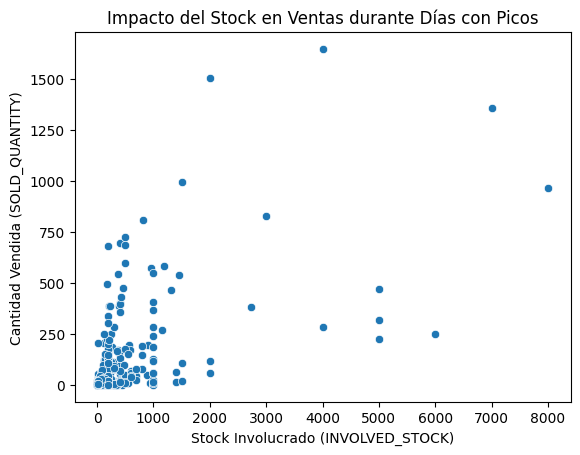

In [21]:
# ofertas de los días con picos altos
offers_on_peak_days = df_ofertas_relampago[df_ofertas_relampago['OFFER_START_DATE'].dt.date.isin(top_sales_days.index)]

# Relación entre Stock y Ventas en días de picos
sns.scatterplot(data=offers_on_peak_days, x='INVOLVED_STOCK', y='SOLD_QUANTITY')
plt.title('Impacto del Stock en Ventas durante Días con Picos')
plt.xlabel('Stock Involucrado (INVOLVED_STOCK)')
plt.ylabel('Cantidad Vendida (SOLD_QUANTITY)')
plt.show()

En el gráfico de dispersión se observa que, incluso en días con picos de ventas, existe una amplia variabilidad. Aunque hay una tendencia general de aumento en las ventas con más stock, también se ve que algunos productos con bajo stock lograron altas ventas y viceversa. Esto refuerza la idea de que el stock no es el único factor determinante para las ventas altas.

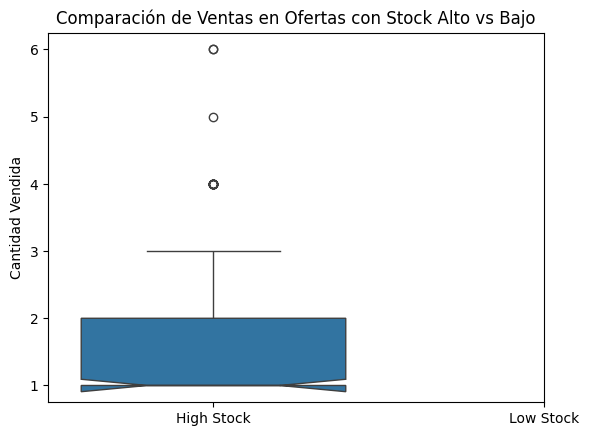

In [22]:
# Umbrales para stock alto y bajo
high_stock_threshold = df_ofertas_relampago['INVOLVED_STOCK'].quantile(0.75)
low_stock_threshold = df_ofertas_relampago['INVOLVED_STOCK'].quantile(0.25)

# Filtrar ofertas con stock alto y bajo
high_stock_offers = df_ofertas_relampago[df_ofertas_relampago['INVOLVED_STOCK'] > high_stock_threshold]
low_stock_offers = df_ofertas_relampago[df_ofertas_relampago['INVOLVED_STOCK'] < low_stock_threshold]

sns.boxplot(data=[high_stock_offers['SOLD_QUANTITY'], low_stock_offers['SOLD_QUANTITY']], notch=True)
plt.xticks([0, 1], ['High Stock', 'Low Stock'])
plt.title('Comparación de Ventas en Ofertas con Stock Alto vs Bajo')
plt.ylabel('Cantidad Vendida')
plt.show()

Las ventas en ofertas con stock alto tienden a ser ligeramente mayores en comparación con las de stock bajo. Sin embargo, la mediana de las ventas no muestra una diferencia dramática entre ambos grupos. También hay algunos **valores atípicos** en el grupo de stock alto, donde algunas ofertas con mucho stock lograron ventas excepcionalmente altas.

In [24]:
# Cambios porcentuales en stock y ventas
df_ofertas_relampago['pct_change_stock'] = df_ofertas_relampago['INVOLVED_STOCK'].pct_change()
df_ofertas_relampago['pct_change_sales'] = df_ofertas_relampago['SOLD_QUANTITY'].pct_change()

# Elasticidad
df_ofertas_relampago['elasticity'] = df_ofertas_relampago['pct_change_sales'] / df_ofertas_relampago['pct_change_stock']

# Descartar valores NaN y analizar la elasticidad
elasticity_summary = df_ofertas_relampago['elasticity'].dropna().describe()
elasticity_summary


/tmp/ipykernel_157510/647884807.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ofertas_relampago['pct_change_sales'] = df_ofertas_relampago['SOLD_QUANTITY'].pct_change()
/home/insightlab/.local/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count    3.776400e+04
mean              NaN
std               NaN
min              -inf
25%     -0.000000e+00
50%      0.000000e+00
75%      6.099206e-01
max               inf
Name: elasticity, dtype: float64

Una elasticidad media de aproximadamente 0.609 donde el 75% de las observaciones tienen una elasticidad igual o menor a este valor. Sugiere que la demanda es relativamente inelástica con respecto al stock. Es decir, cambios en el stock tienen un impacto

**Conclusiones:**

*   Identificamos los dias claves con mayor venta que son del 12 al 27 de julio.
*   Existe una variabiliad en stock y ventas, indicando que el éxito de una oferta no depende únicamente de la cantidad de stock disponible, sino de otros factores como la hora de inicio de la oferta, la categoría del producto, y la duración de la oferta.
*   Es crucial asegurarse de que las ofertas tengan suficiente stock, especialmente para productos populares, para evitar situaciones de "stock out" donde la demanda supera al stock disponible. Las ofertas con stock insuficiente muestran que, si bien algunas lograron ventas altas, se perdió la oportunidad de vender más.
*   El mediodía parece ser el momento óptimo para iniciar las ofertas, y mantenerlas activas durante 5 a 8 horas parece ser la duración ideal para maximizar las ventas.
*   La categoría "Beauty & Health" es claramente dominante en ventas durante los días con picos. Concentrar los esfuerzos en esta categoría puede rendir dividendos significativos durante las campañas de ventas relámpago.